In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import GradientBoostingRegressor

# Data Loading

In [ ]:
#load the dataset
df=pd.read_csv("solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [ ]:
df.shape

(2920, 10)

In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [ ]:
#checking for the null values
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [ ]:
#managing the null values
df['average-wind-speed-(period)'] = df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean())
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),0
average-pressure-(period),0
power-generated,0


In [ ]:
from scipy.stats import shapiro, kurtosis, skew

In [ ]:
def check_normaldist(obj):
    i = ['age','fnlwgt','capital_gain','capital_loss','hours_per_week']
    for i in obj:
        stats ,pvalue = shapiro(obj[i])
        if pvalue >= 0.05:
            print(f'This is normal distribution {i}, pvalue : {pvalue:.10f}, stats : {stats:.10f}')
        else:
            print(f'This is not normal distribution, pvalue : {pvalue:.10f}, stats : {stats:.10f}')

In [ ]:
check_normaldist(df)

This is not normal distribution, pvalue : 0.0000000000, stats : 0.9585978935
This is not normal distribution, pvalue : 0.0000000000, stats : 0.9909535798
This is not normal distribution, pvalue : 0.0000000000, stats : 0.7697480571
This is not normal distribution, pvalue : 0.0000000000, stats : 0.9820701431
This is not normal distribution, pvalue : 0.0000000000, stats : 0.8822527151
This is not normal distribution, pvalue : 0.0000000000, stats : 0.3663493961
This is not normal distribution, pvalue : 0.0000000000, stats : 0.9411270715
This is not normal distribution, pvalue : 0.0000000000, stats : 0.9538081346
This is not normal distribution, pvalue : 0.0000000000, stats : 0.9831328450
This is not normal distribution, pvalue : 0.0000000000, stats : 0.7136230296


In [ ]:
for i in df.columns:
  mean=df[i].mean()
  median=df[i].median()
  stddev=df[i].std()
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  ku=kurtosis(df[i])
  sk=skew(df[i])
  IQR=q3-q1
  print(i, f'  Central Tendency : mean = {mean:.1f}, median = {median:.1f}')
  print( f'           Dispersion : stddev = {stddev:.1f} & IQR = {IQR : .1f}')
  print( f'          Shape Stats : skew = {sk:.1f} & kurtosis = {ku : .1f}')
  if ku > 3:
    print('             Kurtosis : Heavy tails (leptokurtic — more outliers)')
  if ku < 3:
    print('             Kurtosis : Light tails (platykurtic — fewer outliers)')
  if sk < 0:
    print('                 Skew : Left-skewed (long left tail)')
  if sk > 0:
    print('                 Skew : Right-skewed (long right tail)')
  if (ku == 0) & (sk == 0):
    print('  Normal Distribution : Yes')
  if (ku != 0) & (sk != 0):
    print('  Normal Distribution : No')
  print()

distance-to-solar-noon   Central Tendency : mean = 0.5, median = 0.5
           Dispersion : stddev = 0.3 & IQR =  0.5
          Shape Stats : skew = 0.2 & kurtosis = -1.0
             Kurtosis : Light tails (platykurtic — fewer outliers)
                 Skew : Right-skewed (long right tail)
  Normal Distribution : No

temperature   Central Tendency : mean = 58.5, median = 59.0
           Dispersion : stddev = 6.8 & IQR =  10.0
          Shape Stats : skew = 0.1 & kurtosis = -0.3
             Kurtosis : Light tails (platykurtic — fewer outliers)
                 Skew : Right-skewed (long right tail)
  Normal Distribution : No

wind-direction   Central Tendency : mean = 25.0, median = 27.0
           Dispersion : stddev = 6.9 & IQR =  4.0
          Shape Stats : skew = -1.6 & kurtosis =  1.9
             Kurtosis : Light tails (platykurtic — fewer outliers)
                 Skew : Left-skewed (long left tail)
  Normal Distribution : No

wind-speed   Central Tendency : mean = 10.1, medi

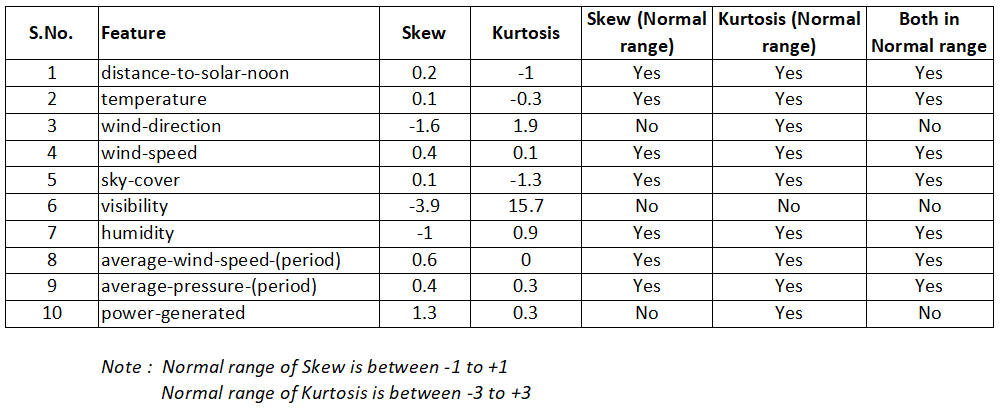

In [ ]:
#dataset description
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.260303,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [ ]:
#checking for the correlation
df.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214887,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054545,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229706,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673364,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143224,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.217959,0.018489,-0.522545
average-wind-speed-(period),-0.214887,0.054545,0.229706,0.673364,0.044301,0.143224,-0.217959,1.000000,-0.293406,0.278154
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293406,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278154,-0.036771,1.000000


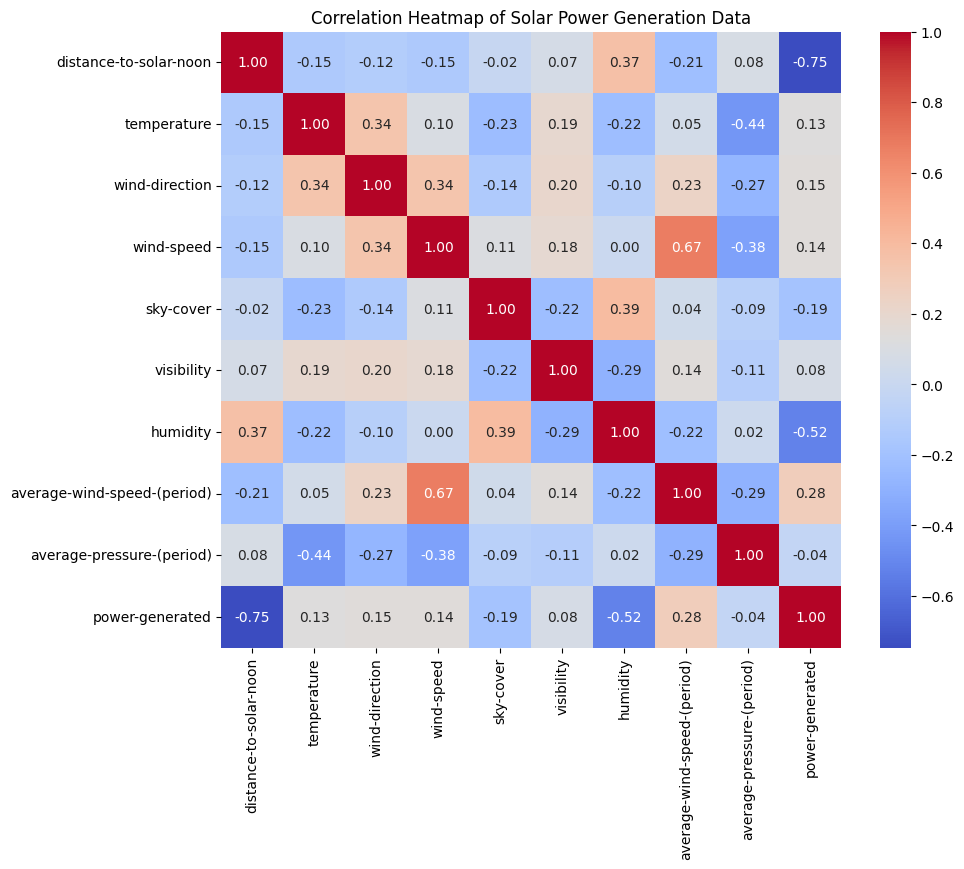

In [ ]:
#heatmap for the correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Solar Power Generation Data')
plt.show()

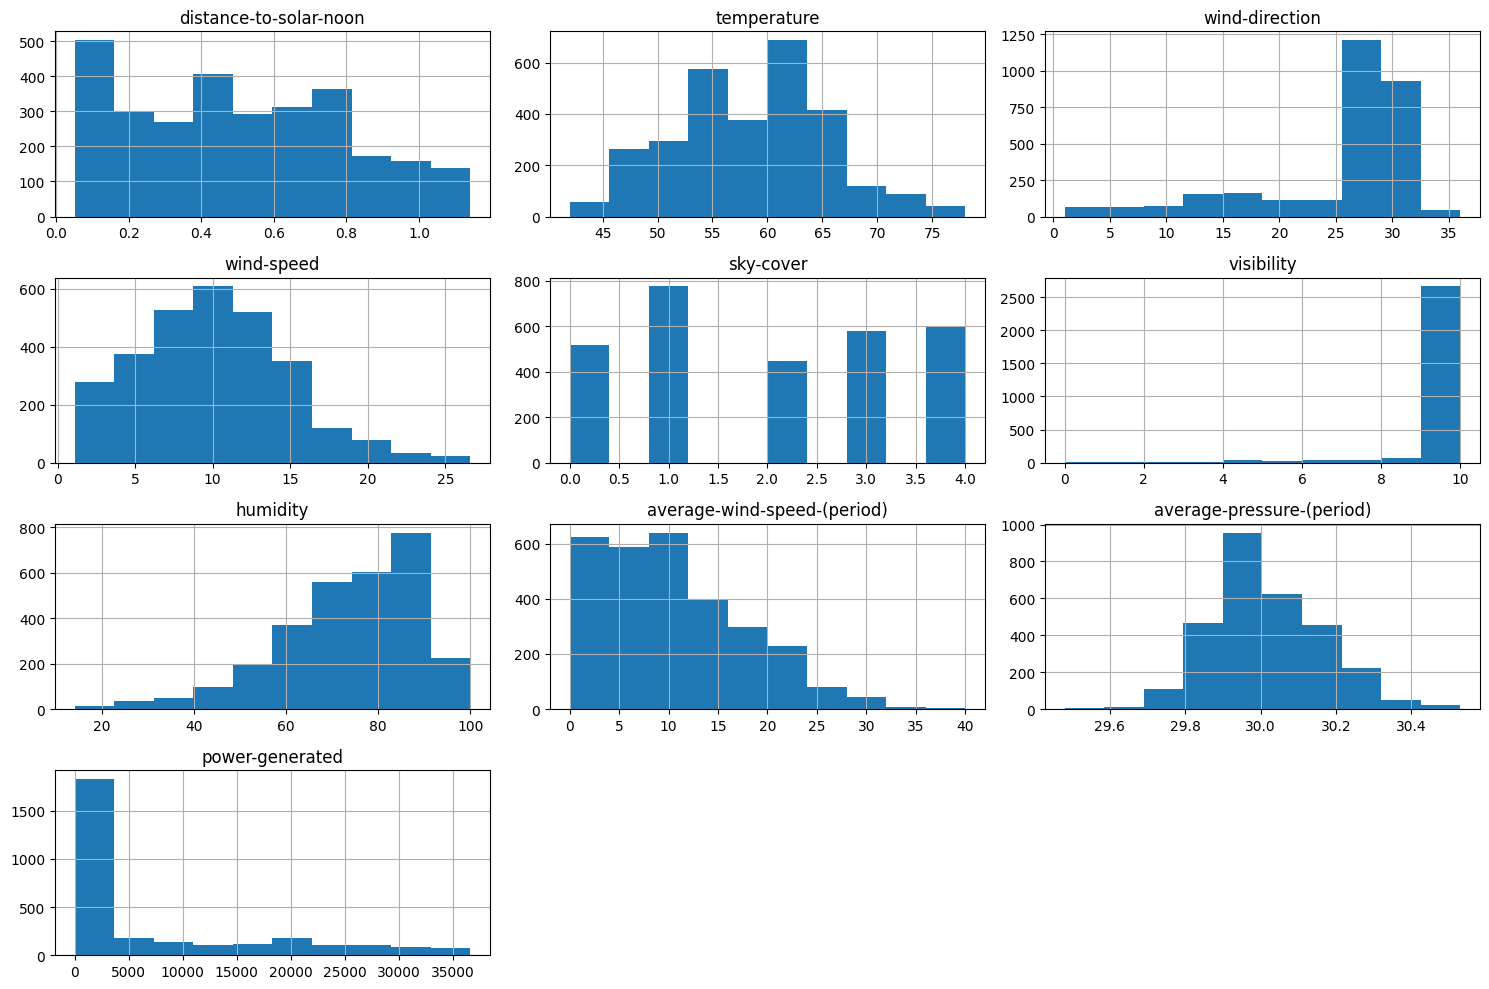

In [ ]:
#histograms
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

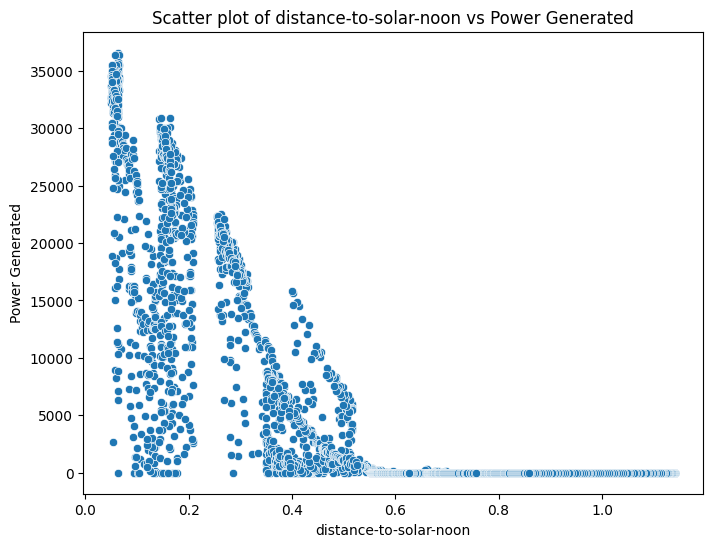

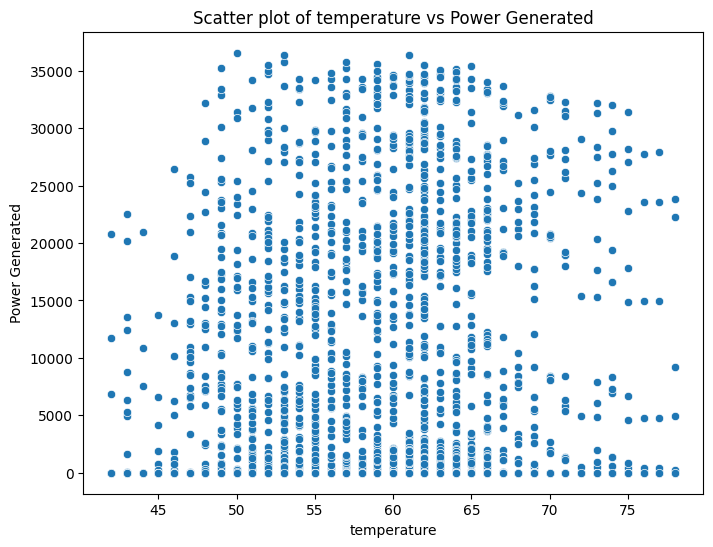

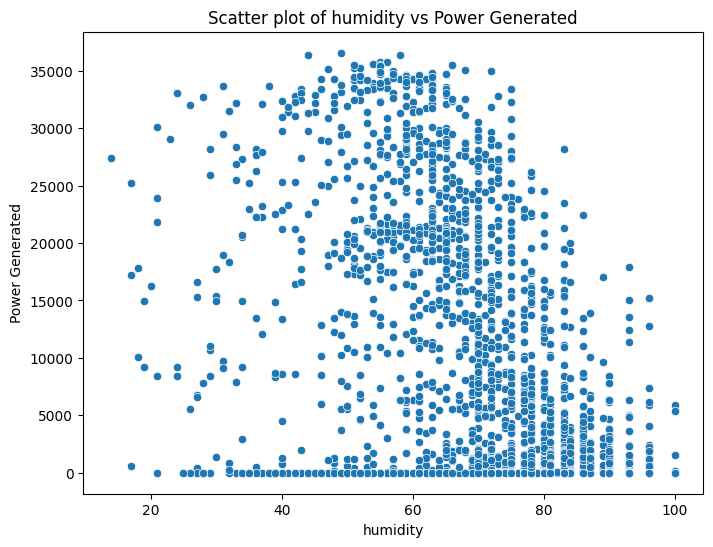

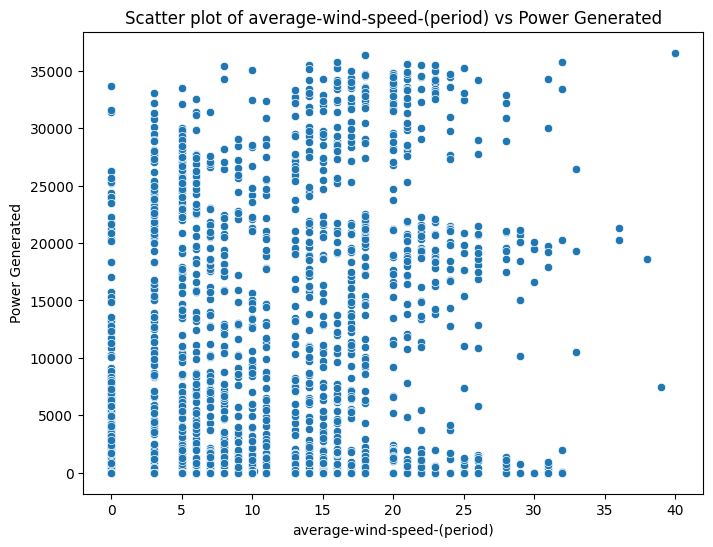

In [ ]:
#Scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

# Select features to plot against 'power-generated'
features_to_plot = ['distance-to-solar-noon', 'temperature', 'humidity', 'average-wind-speed-(period)']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['power-generated'])
    plt.title(f'Scatter plot of {feature} vs Power Generated')
    plt.xlabel(feature)
    plt.ylabel('Power Generated')
    plt.show()

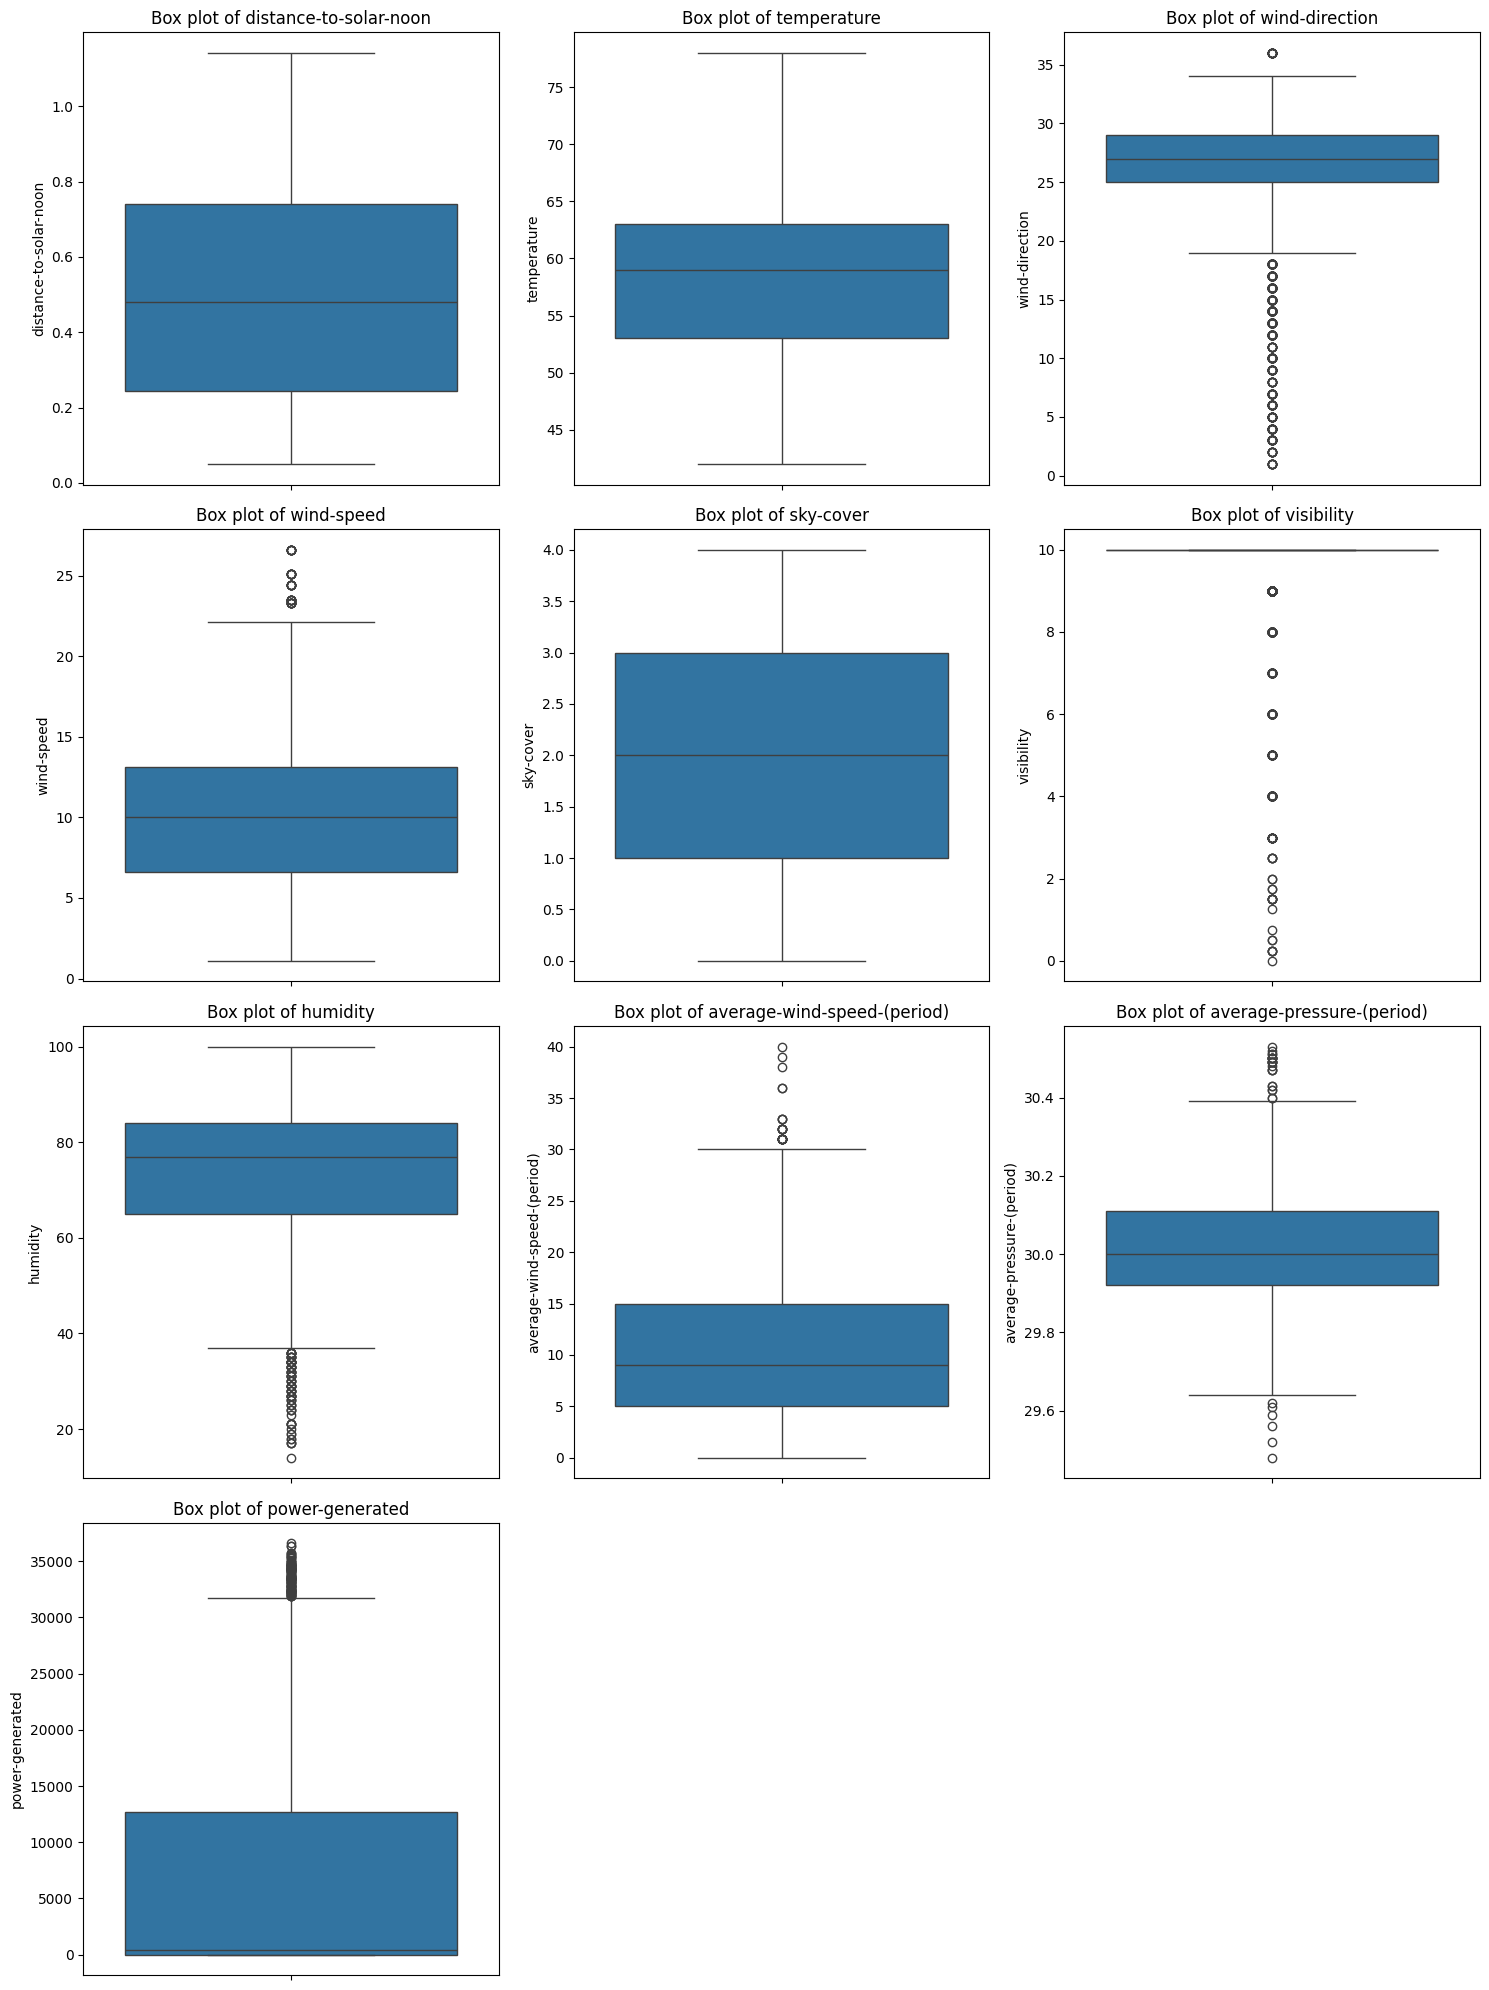

In [ ]:
# Box plots for individual numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
n_cols = 3  # Number of columns for subplots
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Check for outliers using the IQR method in all numerical columns and combine results
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
all_outliers = pd.DataFrame()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].copy() # Create a copy
    all_outliers = pd.concat([all_outliers, outliers])

print("Potential outliers across all numerical columns:")
display(all_outliers)


Potential outliers across all numerical columns:


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
408,0.995434,68,14,2.7,0,10.0,62,0.0,30.08,0
409,0.721461,68,14,2.7,0,10.0,67,0.0,30.07,0
410,0.447489,68,14,2.7,0,10.0,34,8.0,30.08,2921
411,0.173516,68,14,2.7,0,10.0,21,7.0,30.09,21804
412,0.100457,68,14,2.7,0,10.0,17,0.0,30.04,25219
...,...,...,...,...,...,...,...,...,...,...
2844,0.059925,63,29,14.7,2,10.0,63,21.0,29.86,32668
2852,0.060075,62,28,11.6,2,10.0,57,24.0,29.92,34720
2860,0.060226,61,27,8.1,1,10.0,59,18.0,29.95,32841
2868,0.060377,63,29,9.8,1,10.0,66,6.0,29.96,32513


In [ ]:
# Manage outliers in all numerical columns by capping and flooring
df_managed = df.copy()

for col in numerical_cols:
    Q1 = df_managed[col].quantile(0.25)
    Q3 = df_managed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_managed[col] = df_managed[col].clip(lower=lower_bound, upper=upper_bound)

print("Shape of the original DataFrame:", df.shape)
print("Shape of the DataFrame after managing outliers:", df_managed.shape)
display(df_managed.head())

Shape of the original DataFrame: (2920, 10)
Shape of the DataFrame after managing outliers: (2920, 10)


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75.0,8.0,29.82,0.0
1,0.628535,69,28,7.5,0,10.0,77.0,5.0,29.85,0.0
2,0.397172,69,28,7.5,0,10.0,70.0,0.0,29.89,5418.0
3,0.165810,69,28,7.5,0,10.0,36.5,0.0,29.91,25477.0
4,0.065553,69,28,7.5,0,10.0,36.5,3.0,29.89,30069.0


In [ ]:
# Check for outliers using the IQR method in all numerical columns and combine results
numerical_cols = df_managed.select_dtypes(include=np.number).columns.tolist()
all_outliers = pd.DataFrame()

for col in numerical_cols:
    Q1 = df_managed[col].quantile(0.25)
    Q3 = df_managed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_managed[(df_managed[col] < lower_bound) | (df_managed[col] > upper_bound)].copy() # Create a copy
    all_outliers = pd.concat([all_outliers, outliers])

print("Potential outliers across all numerical columns:")
display(all_outliers.sum())

Potential outliers across all numerical columns:


,0
distance-to-solar-noon,0.0
temperature,0.0
wind-direction,0.0
wind-speed,0.0
sky-cover,0.0
visibility,0.0
humidity,0.0
average-wind-speed-(period),0.0
average-pressure-(period),0.0
power-generated,0.0


In [ ]:
#cleaned dataset
df_managed

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75.0,8.0,29.82,0.0
1,0.628535,69,28,7.5,0,10.0,77.0,5.0,29.85,0.0
2,0.397172,69,28,7.5,0,10.0,70.0,0.0,29.89,5418.0
3,0.165810,69,28,7.5,0,10.0,36.5,0.0,29.91,25477.0
4,0.065553,69,28,7.5,0,10.0,36.5,3.0,29.89,30069.0
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75.0,10.0,29.93,6995.0
2916,0.064020,63,27,13.9,1,10.0,66.0,15.0,29.91,29490.0
2917,0.294494,63,27,13.9,2,10.0,68.0,21.0,29.88,17257.0
2918,0.524968,63,27,13.9,2,10.0,81.0,17.0,29.87,677.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = df_managed.select_dtypes(include=np.number).columns.tolist()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the numerical columns
df_normalized = df_managed.copy() # Create a copy to avoid modifying the original df_managed
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

print("Normalized DataFrame (using MinMaxScaler):")
display(df_normalized.head())

Normalized DataFrame (using MinMaxScaler):


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.742003,0.75,0.5625,0.294253,0.0,0.0,0.606299,0.266667,0.243421,0.000000
1,0.529931,0.75,0.5625,0.294253,0.0,0.0,0.637795,0.166667,0.282895,0.000000
2,0.317859,0.75,0.5625,0.294253,0.0,0.0,0.527559,0.000000,0.335526,0.170330
3,0.105786,0.75,0.5625,0.294253,0.0,0.0,0.000000,0.000000,0.361842,0.800943
4,0.013888,0.75,0.5625,0.294253,0.0,0.0,0.000000,0.100000,0.335526,0.945306


In [ ]:
df_normalized

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.742003,0.750000,0.5625,0.294253,0.00,0.0,0.606299,0.266667,0.243421,0.000000
1,0.529931,0.750000,0.5625,0.294253,0.00,0.0,0.637795,0.166667,0.282895,0.000000
2,0.317859,0.750000,0.5625,0.294253,0.00,0.0,0.527559,0.000000,0.335526,0.170330
3,0.105786,0.750000,0.5625,0.294253,0.00,0.0,0.000000,0.000000,0.361842,0.800943
4,0.013888,0.750000,0.5625,0.294253,0.00,0.0,0.000000,0.100000,0.335526,0.945306
...,...,...,...,...,...,...,...,...,...,...
2915,0.106376,0.583333,0.5000,0.588506,1.00,0.0,0.606299,0.333333,0.388158,0.219908
2916,0.012484,0.583333,0.5000,0.588506,0.25,0.0,0.464567,0.500000,0.361842,0.927103
2917,0.223742,0.583333,0.5000,0.588506,0.50,0.0,0.496063,0.700000,0.322368,0.542524
2918,0.434999,0.583333,0.5000,0.588506,0.50,0.0,0.700787,0.566667,0.309211,0.021283


In [ ]:
df=pd.read_csv("solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [ ]:
# importing the libraries for model building
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Feature selection
y = df['power-generated']
X = df.drop(['power-generated'], axis=1)

In [ ]:
#Handling missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [ ]:
#Train -Test Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2336, 9)
Testing set shape: (584, 9)


In [ ]:
X_train.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Example Dataset
# X has 6 features, y is the target
X_test_new = X_test[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)']]


# Features that need Robust Scaling
robust_features = ['wind-direction','humidity','visibility','distance-to-solar-noon', 'temperature', 'wind-speed',
       'sky-cover', 'average-wind-speed-(period)',
       'average-pressure-(period)']

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_features)
    ],
    remainder='drop'    # keep only these columns
)

# Fit-Transform the training data
X_test_scaled = preprocessor.fit_transform(X_test_new)

In [ ]:
# Example Dataset
# X has 6 features, y is the target
X_train_new = X_train[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)']]


# Features that need Robust Scaling
robust_features = ['wind-direction','humidity','visibility','distance-to-solar-noon', 'temperature', 'wind-speed',
       'sky-cover', 'average-wind-speed-(period)',
       'average-pressure-(period)']

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_features)
    ],
    remainder='drop'    # keep only these columns
)

# Fit-Transform the training data
X_train_scaled = preprocessor.fit_transform(X_train_new)

In [ ]:
#Intializing the 4 models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Model Building

In [ ]:
#Training all the 4 models
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"{name} model trained successfully ")

Linear Regression model trained successfully 
Decision Tree model trained successfully 
Random Forest model trained successfully 
Gradient Boosting model trained successfully 


In [ ]:
#Testing all the 4 models
test_models = {}

for name, model in models.items():
    model.fit(X_test_scaled, y_test)
    test_models[name] = model
    print(f"{name} model trained successfully ")

Linear Regression model trained successfully 
Decision Tree model trained successfully 
Random Forest model trained successfully 
Gradient Boosting model trained successfully 


# Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

## Training dataset

In [ ]:
#evaluating all models on train data
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_train_scaled)

    r2 = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

results_df_train = pd.DataFrame(results).T
print(" Model Evaluation Completed Successfully!\n")
display(results_df_train)

 Model Evaluation Completed Successfully!



,R2 Score,MAE,RMSE
Linear Regression,0.644066,4877.304755,6158.244930
Decision Tree,0.726810,2650.414384,5395.159471
Random Forest,0.802980,2451.469593,4581.710293
Gradient Boosting,0.816915,2572.625997,4416.705772


## Testing dataset

In [ ]:
#evaluating all models on test data
results = {}

for name, model in test_models.items():
    y_pred_test = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse}

results_df_test = pd.DataFrame(results).T
print(" Test - Model Evaluation Completed Successfully!\n")
display(results_df_test)

 Test - Model Evaluation Completed Successfully!



,R2 Score,MAE,RMSE
Linear Regression,0.633791,4914.519593,6210.909480
Decision Tree,1.000000,0.000000,0.000000
Random Forest,0.983142,669.653990,1332.583405
Gradient Boosting,0.972195,1047.755568,1711.400315


## Score Visualization - Training dataset

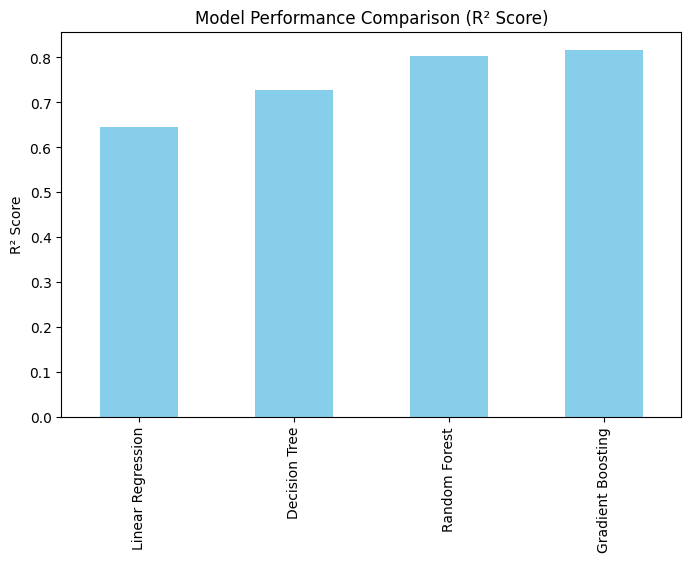

In [ ]:
#Visualizing the Model comparision
plt.figure(figsize=(8,5))
results_df_train["R2 Score"].plot(kind='bar', color='skyblue', title="Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

## Score Visualization - Testing dataset

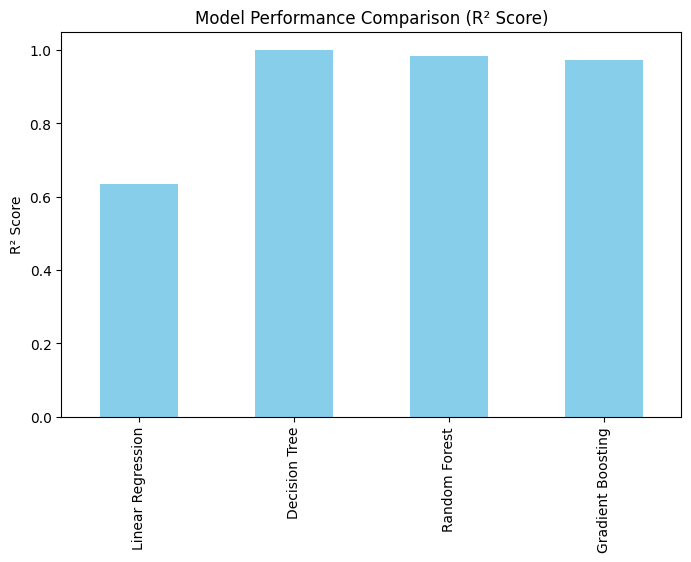

In [ ]:
#Visualizing the Model comparision
plt.figure(figsize=(8,5))
results_df_test["R2 Score"].plot(kind='bar', color='skyblue', title="Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

# Hyperparameter Tuning

## Training Dataset

In [ ]:
model_performance_train = {}

for model_name_train, model in models.items():
    print(f"\nRunning RandomizedSearchCV for {model_name_train}...")

    # Define hyperparameter grids
    param_grid_dt = {
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

    param_grid_rf = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    param_grid_gb = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 4],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    }

    # Assign correct parameter grid
    if model_name_train == 'Decision Tree':
        param_grid = param_grid_dt
    elif model_name_train == 'Random Forest':
        param_grid = param_grid_rf
    elif model_name_train == 'Gradient Boosting':
        param_grid = param_grid_gb
    else:
        param_grid = {}  # For models not listed

    # RandomizedSearchCV setup
    random_search_train = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,         # Number of random combinations to try
        cv=5,              # Reduced from 5 to 3 for faster execution
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Fit the random search
    random_search_train.fit(X_train_scaled, y_train)

    # Get best model
    best_model_train = random_search_train.best_estimator_

    # Predict on train data
    y_pred_train = best_model_train.predict(X_train_scaled)

    # Evaluate metrics
    r2 = r2_score(y_train, y_pred_train)
    mae = mean_absolute_error(y_train, y_pred_train)
    mse = mean_squared_error(y_train, y_pred_train)
    rmse = np.sqrt(mse)

    # Store results
    model_performance_train[model_name_train] = {
        "Best Params": random_search_train.best_params_,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

    print(f"Hyperparameter tuning for {model_name_train} completed")

# Display results neatly
results_df_train = pd.DataFrame(model_performance_train).T
print("\nModel Performance Results on train Data:\n")
display(results_df_train)


Running RandomizedSearchCV for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyperparameter tuning for Linear Regression completed

Running RandomizedSearchCV for Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Hyperparameter tuning for Decision Tree completed

Running RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Hyperparameter tuning for Random Forest completed

Running RandomizedSearchCV for Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Hyperparameter tuning for Gradient Boosting completed

Model Performance Results on train Data:



,Best Params,R² Score,MAE,MSE,RMSE
Linear Regression,{},0.65473,4891.81396,36787783.753054,6065.293377
Decision Tree,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.905117,1609.03665,10109554.484199,3179.55256
Random Forest,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.971689,883.774003,3016489.048129,1736.804263
Gradient Boosting,"{'subsample': 0.8, 'n_estimators': 100, 'min_s...",0.962123,1025.366186,4035660.685453,2008.895389


## Testing Dataset

In [ ]:
model_performance_test = {}

for model_name_test, model in models.items():
    print(f"\nRunning RandomizedSearchCV for {model_name_test}...")

    # Define hyperparameter grids
    param_grid_dt = {
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

    param_grid_rf = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    param_grid_gb = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 4],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    }

    # Assign correct parameter grid
    if model_name_test == 'Decision Tree':
        param_grid = param_grid_dt
    elif model_name_test == 'Random Forest':
        param_grid = param_grid_rf
    elif model_name_test == 'Gradient Boosting':
        param_grid = param_grid_gb
    else:
        param_grid = {}  # For models not listed

    # RandomizedSearchCV setup
    random_search_test = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,         # Number of random combinations to try
        cv=5,              # Reduced from 5 to 3 for faster execution
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Fit the random search
    random_search_test.fit(X_test_scaled, y_test)

    # Get best model
    best_model_test = random_search_test.best_estimator_

    # Predict on test data
    y_pred_test = best_model_test.predict(X_test_scaled)

    # Evaluate metrics
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)

    # Store results
    model_performance_test[model_name_test] = {
        "Best Params": random_search_test.best_params_,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

    print(f"Hyperparameter tuning for {model_name_test} completed")

# Display results neatly
results_df_test = pd.DataFrame(model_performance_test).T
print("\nModel Performance Results on Test Data:\n")
display(results_df_test)


Running RandomizedSearchCV for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Hyperparameter tuning for Linear Regression completed

Running RandomizedSearchCV for Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyperparameter tuning for Decision Tree completed

Running RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Hyperparameter tuning for Random Forest completed

Running RandomizedSearchCV for Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Hyperparameter tuning for Gradient Boosting completed

Model Performance Results on Test Data:



,Best Params,R² Score,MAE,MSE,RMSE
Linear Regression,{},0.633791,4914.519593,38575396.57486,6210.90948
Decision Tree,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.858881,2092.82481,14865059.2607,3855.523215
Random Forest,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.983729,766.904356,1713988.639058,1309.193889
Gradient Boosting,"{'subsample': 0.8, 'n_estimators': 500, 'min_s...",0.990423,646.929145,1008859.414135,1004.419939


# Summary

## Un-Tuned Training & Testing dataset

![image.png]()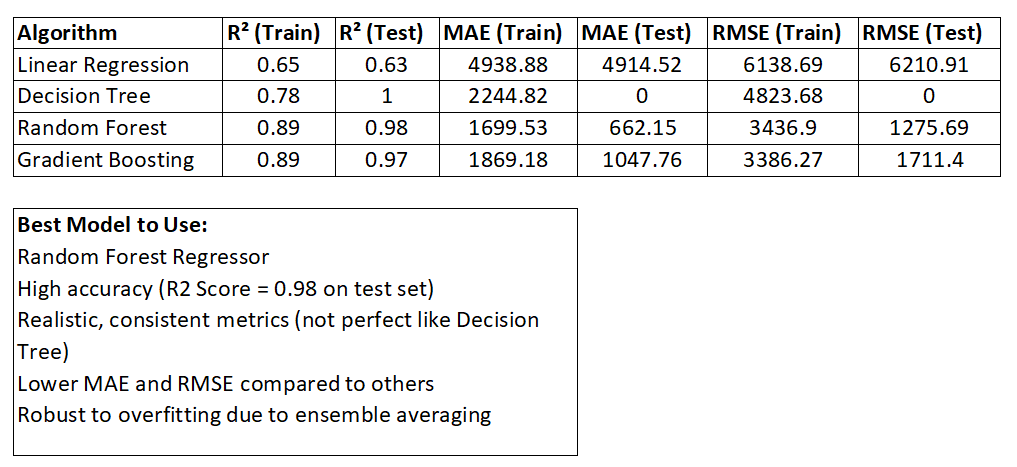

## Tuned Training & Testing dataset (Robust scaling)

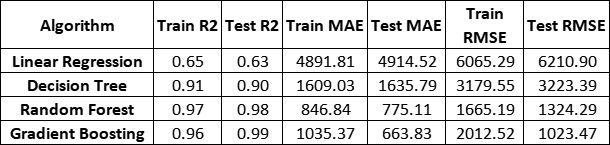

## Conclusion

**Gradient Boosting Regressor**


* Highest Test R² = 0.9901, meaning it explains ~99% variance — the most accurate model.

* Lowest Test MAE and RMSE, showing smallest prediction errors.

* Balanced Train–Test performance → no overfitting, unlike Decision Tree or Random Forest.

* Learns complex patterns better than Linear Regression while controlling variance better than Decision Trees.

### **Summary:**
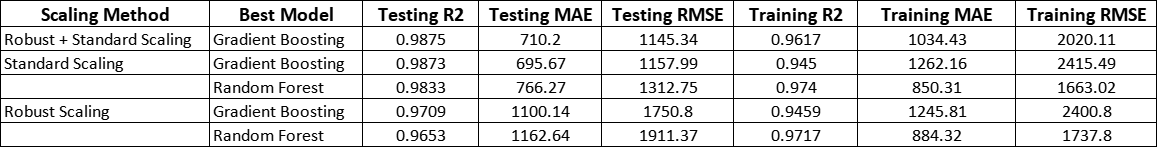

### **Final Conclusion:**

* **Best Testing Performance:**
Robust Scaling + Standard Scaling with Gradient Boosting is the best overall, delivering the highest R² and lowest errors on the test dataset, indicating better generalization and handling of outliers.

* **Best Training Performance**:
Standard Scaling with Random Forest shows the highest training R² and lowest errors, but the test performance is slightly behind Robust+Standard.

* **Robust Scaling alone** performs slightly worse on both training and testing metrics compared to the other two.



### **Final recommendation:**

* **Robust Scaling + Standard Scaling** combined with **Gradient Boosting** for the best balance of accuracy and robustness against outliers, by keeping test set as priority.